In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#importing the dataset
data=pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
corr=data.corr()
corr

<ipython-input-6-0d3ae1d0be10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
#chcecking the null values
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we have null values in Age,Cabin,Embarked attributes.For numerical data, you can replace missing values with the mean/median.For categorical data, you can replace missing values with the mode

In [9]:
 # replacing the null values in Age attribute
 data['Age'].fillna(data['Age'].mean(), inplace=True)

In [10]:
data.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [11]:
#replacing null values in Cabin and embarked attributes
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [12]:
data.Cabin

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [13]:
data.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

Now nullvalues are removed from our dataset

In [14]:
data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
data.Cabin.value_counts()

B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

#Data visualization

<Axes: xlabel='Age', ylabel='Survived'>

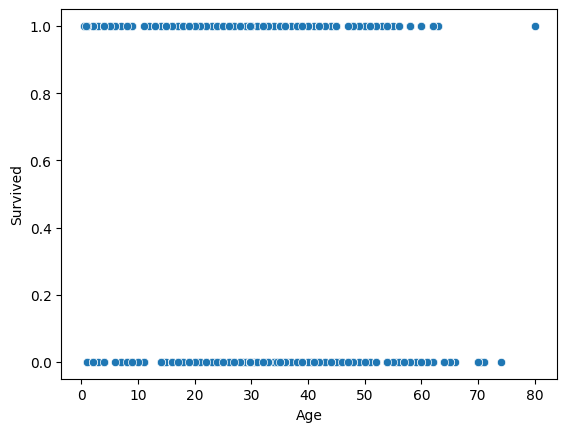

In [ ]:
#scatterplot
sns.scatterplot(x="Age",y="Survived",data=data)

<ipython-input-24-62ee70f24edc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])


<Axes: xlabel='Age', ylabel='Density'>

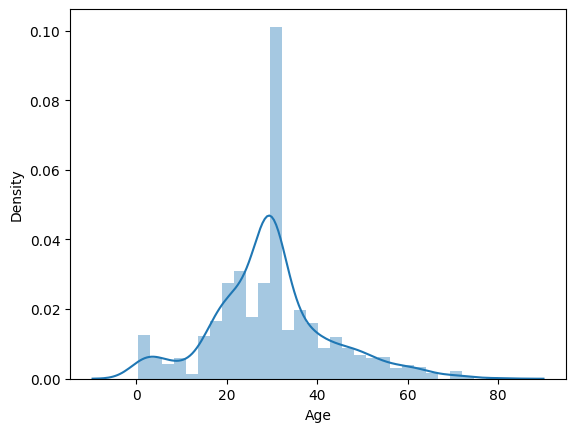

In [ ]:
sns.distplot(data["Age"])

<ipython-input-31-8bee7cfa7901>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="Survived", y="Age",ci=None)


<Axes: xlabel='Survived', ylabel='Age'>

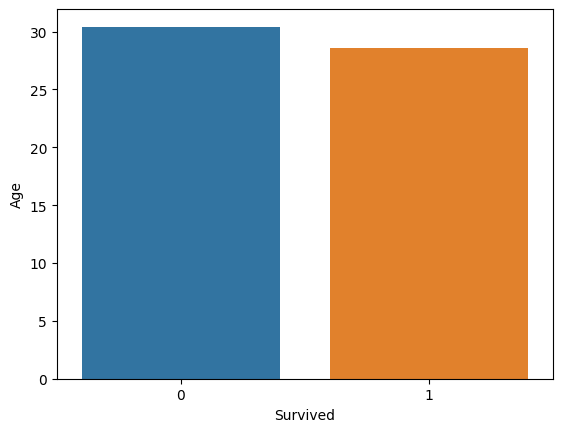

In [ ]:

sns.barplot(data=data, x="Survived", y="Age",ci=None)


<Axes: xlabel='Sex', ylabel='count'>

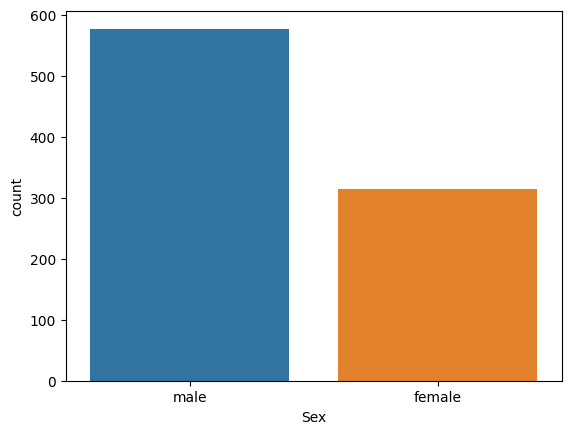

In [ ]:
sns.countplot(x="Sex",data=data)


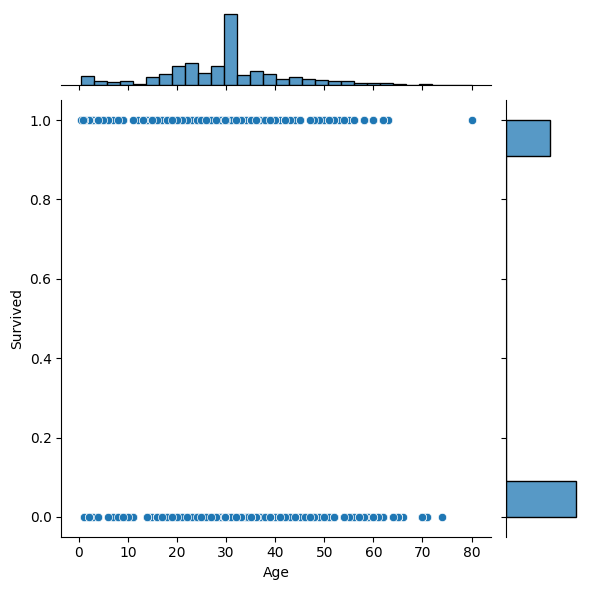

In [ ]:
sns.jointplot(x="Age",y="Survived",data=data)

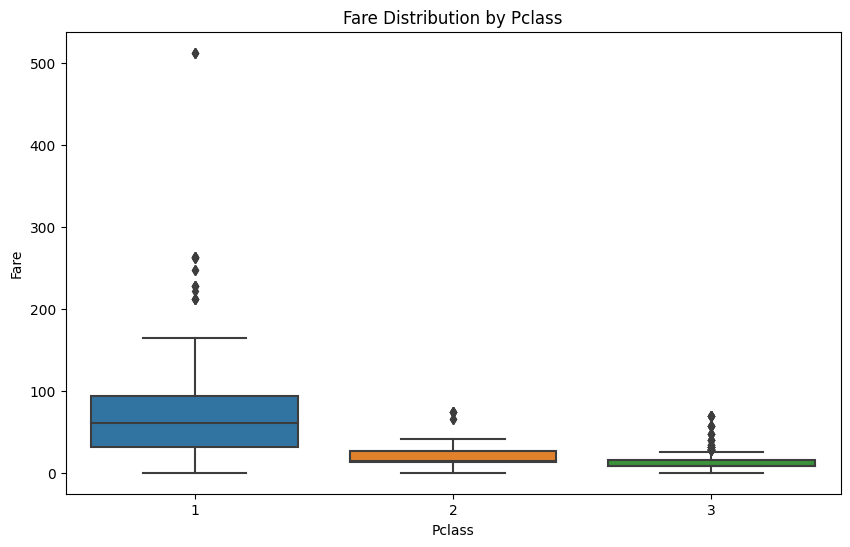

In [17]:



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Pclass', y='Fare')
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

<Axes: >

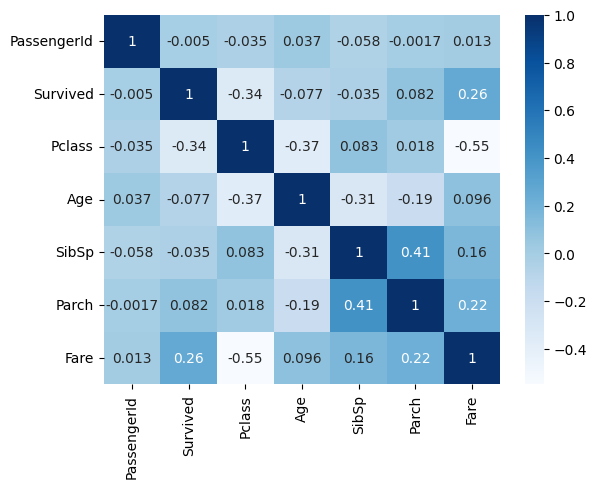

In [18]:
sns.heatmap(corr,annot=True,cmap="Blues")

#Outlier detection

<Axes: >

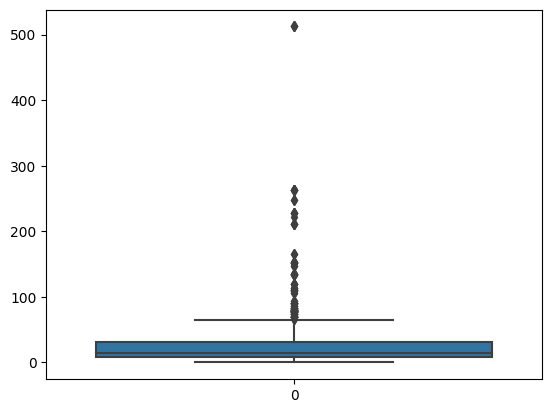

In [ ]:
sns.boxplot(data['Fare'])

<Axes: >

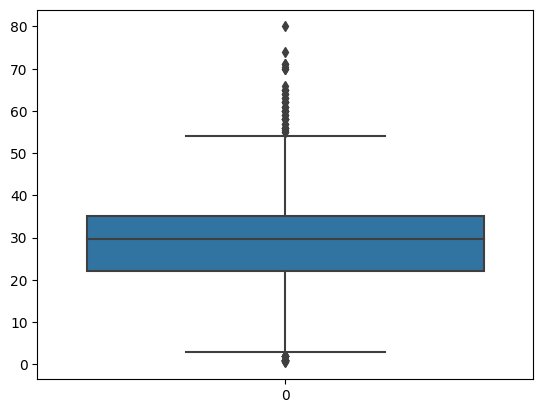

In [ ]:
sns.boxplot(data['Age'])

<Axes: >

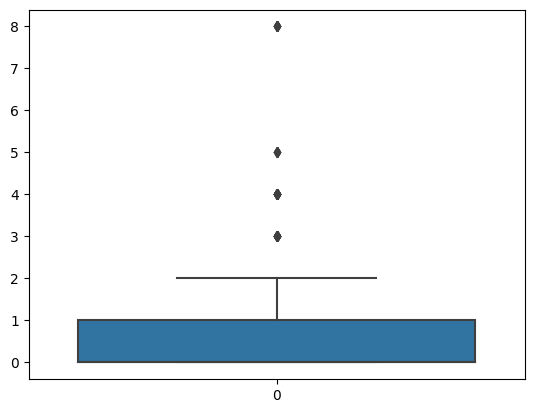

In [ ]:
sns.boxplot(data['SibSp'])

<Axes: >

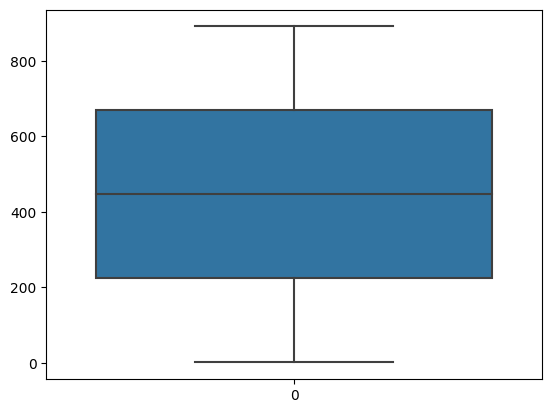

In [ ]:
sns.boxplot(data['PassengerId'])

So,From the above boxplots,we can see there are outliers in Age,Sibsip, and Fare attributes.

# Handling outliers

In [19]:
#Outlier removal using iqr method
#for age
q1=data.Age.quantile(0.25)
q3=data.Age.quantile(0.75)


In [20]:
print(q1)
print(q3)

22.0
35.0


In [40]:
IQR=q3-q1
IQR
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR


In [41]:
data=data[ (data['Age']<upper_limit ) | (data['Age']>lower_limit)]

<Axes: >

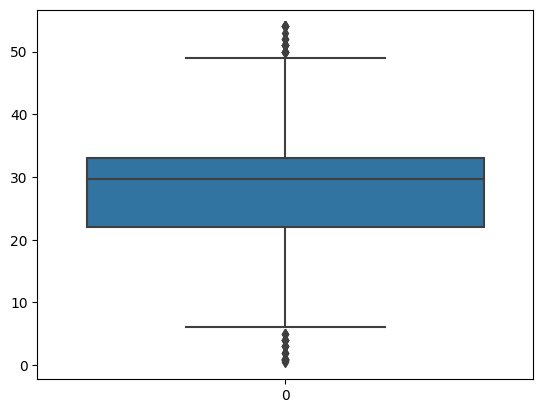

In [42]:
sns.boxplot(data.Age)

In [43]:
data.Age.shape

(705,)

In [44]:
#for fare
q1=data.Fare.quantile(0.25)
q3=data.Fare.quantile(0.75)

In [26]:
print(q1)
print(q3)

7.8958
30.5


In [27]:
IQR=q3-q1
IQR
upper_limit=q3+1.5*IQR
upper_limit

64.4063

In [28]:
data=data[data.Fare<upper_limit]

In [53]:
data.Fare.shape

(705,)

<Axes: >

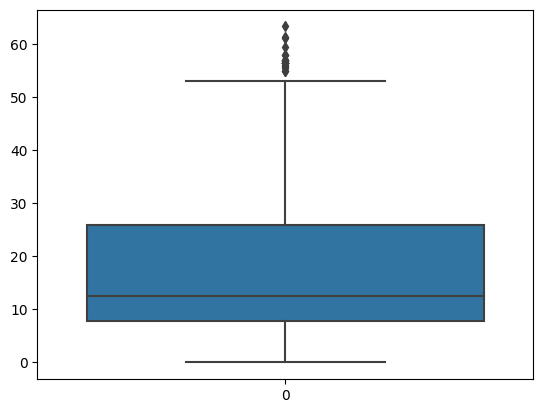

In [29]:
sns.boxplot(data['Fare'])

In [30]:
# handling sibsp attribute
q1=data.SibSp.quantile(0.25)
q3=data.SibSp.quantile(0.75)

In [31]:
print(q1)
print(q3)

0.0
1.0


In [32]:
IQR=q3-q1
IQR
upper_limit=q3+1.5*IQR
upper_limit

2.5

In [33]:
data=data[data.SibSp<upper_limit]

In [54]:
data.SibSp.shape

(705,)

<Axes: >

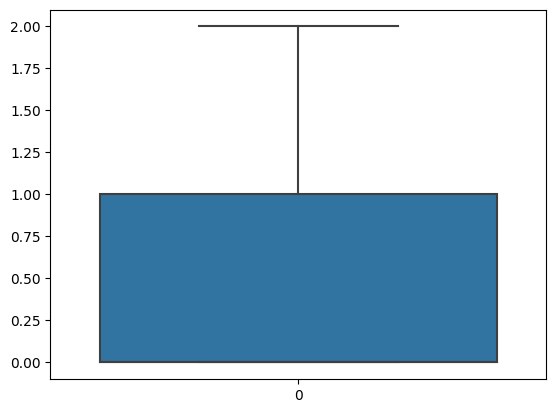

In [34]:
sns.boxplot(data['SibSp'])

In [55]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,451.211348,0.354610,2.492199,28.497462,0.283688,0.292199,16.779822
std,258.894875,0.478735,0.721235,10.263420,0.512988,0.762963,13.139205
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.879200
50%,451.000000,0.000000,3.000000,29.699118,0.000000,0.000000,11.133300
75%,675.000000,1.000000,3.000000,33.000000,1.000000,0.000000,24.000000
max,891.000000,1.000000,3.000000,54.000000,2.000000,6.000000,63.358300


we can see mean,sd values are changed after applying IQR method for outliers.so we can say that outliers are removed from our dataset.

In [52]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,B96 B98,Q


#Separating Dependent and independent variables

In [68]:
new_x = data.iloc[:,2:]
X=new_x.drop(columns=["Name","Ticket","Cabin"],axis=1) #removing the unnecessary attributes


In [69]:
x.head()         #independent variables

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q


In [70]:
#dependent variables
y=data["Survived"]
y.head()

0    0
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64

#Encoding

In [74]:
#one hot encoding
x_encoded=pd.get_dummies(x,columns=["Pclass","Sex","Embarked"],drop_first=True)


In [72]:
x_encoded.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,0,1,1,0,1
2,1,26.000000,0,0,7.9250,0,1,0,0,1
3,1,35.000000,1,0,53.1000,0,0,0,0,1
4,0,35.000000,0,0,8.0500,0,1,1,0,1
5,0,29.699118,0,0,8.4583,0,1,1,1,0


We are performing one hot encoding only one x,  as y (survived) has already values 0 and 1

#Feature scaling

In [75]:
#using min max scaler
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [78]:
x_scaled=pd.DataFrame(ms.fit_transform(x_encoded),columns=x_encoded.columns)

In [79]:
x_scaled.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.402762,0.5,0.0,0.114429,0.0,1.0,1.0,0.0,1.0
1,1.0,0.477417,0.0,0.0,0.125082,0.0,1.0,0.0,0.0,1.0
2,1.0,0.645390,0.5,0.0,0.838091,0.0,0.0,0.0,0.0,1.0
3,0.0,0.645390,0.0,0.0,0.127055,0.0,1.0,1.0,0.0,1.0
4,0.0,0.546456,0.0,0.0,0.133499,0.0,1.0,1.0,1.0,0.0


Our values are now scaled

#splitting data into train and test

In [80]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size =0.2,random_state =0)

In [85]:
print(x_train.shape)

(564, 10)


In [86]:
print(x_test.shape)

(141, 10)


In [87]:
print(y_train.shape)

(564,)


In [88]:
print(y_test.shape)

(141,)
